In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import plotly.express as px

In [5]:
data=pd.read_csv("water_potability.csv")

In [6]:
data.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [7]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [8]:
data.shape

(3276, 10)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [19]:
data.describe().T.style.background_gradient(axis=1)

In [22]:
data.describe().loc[['min', '50%', 'mean', 'max', 'std']].T.style.background_gradient(axis=1)

In [28]:
column_names=data.columns
for index, col_name in enumerate(column_names):
    print(index, col_name)

0 ph
1 Hardness
2 Solids
3 Chloramines
4 Sulfate
5 Conductivity
6 Organic_carbon
7 Trihalomethanes
8 Turbidity
9 Potability


1. pH value:
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.
2. Hardness:
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.
3. Solids (Total dissolved solids - TDS):
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.
4. Chloramines:
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.
5. Sulfate:
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.
6. Conductivity:
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.
7. Organic_carbon:
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.
8. Trihalomethanes:
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.
9. Turbidity:
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.
10. Potability:
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.


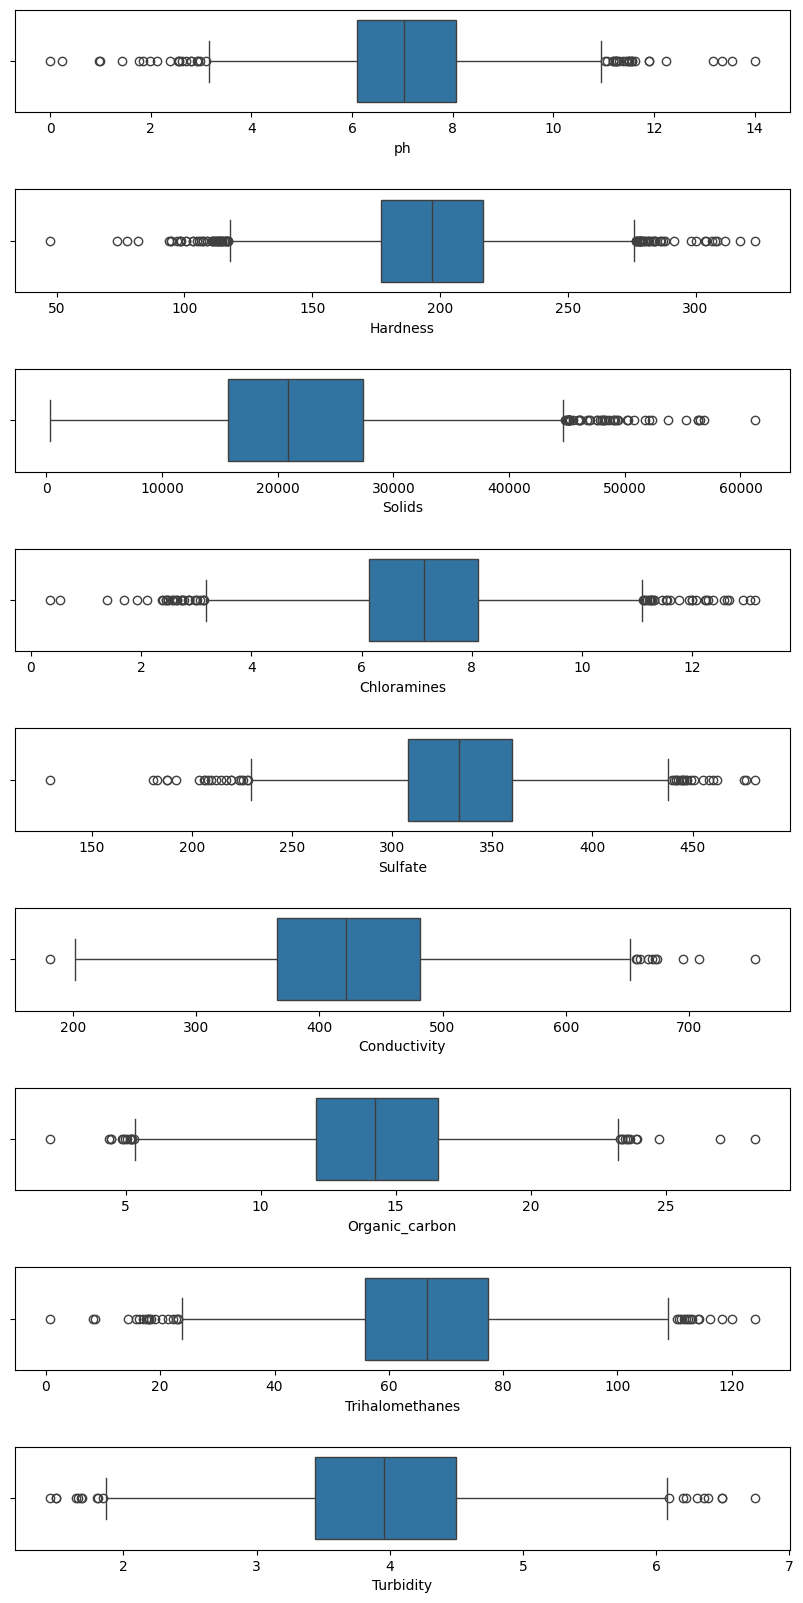

In [40]:
fig,axis=plt.subplots(9,1,figsize=(10,20))
fig.subplots_adjust(hspace=0.75)
for i in range(9):
    sns.boxplot(x=column_names[i],data=data,ax=axis[i])

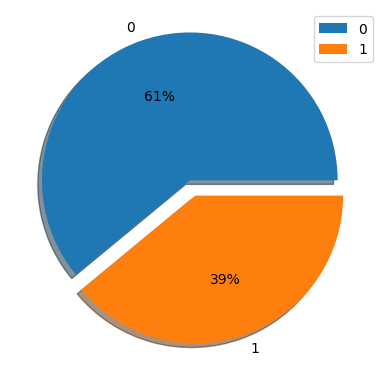

In [52]:
tar=data['Potability'].value_counts()
plt.pie(tar,labels=[0,1],explode=[0.1,0.01],autopct="%.f%%",shadow=True)
plt.legend()
plt.show()

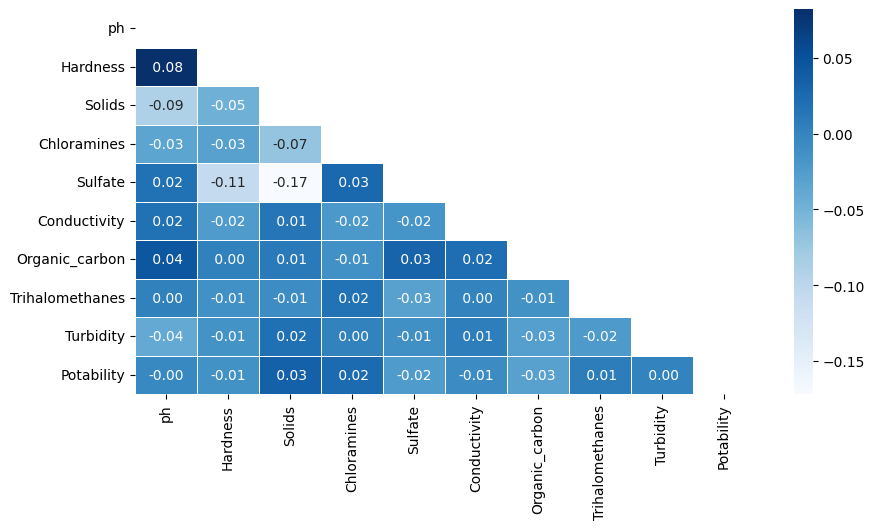

In [69]:
corr=data.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr,annot=True, fmt=' .2f',linewidths=0.5, linecolor='white',mask=np.triu(corr),cmap='Blues')
plt.show()

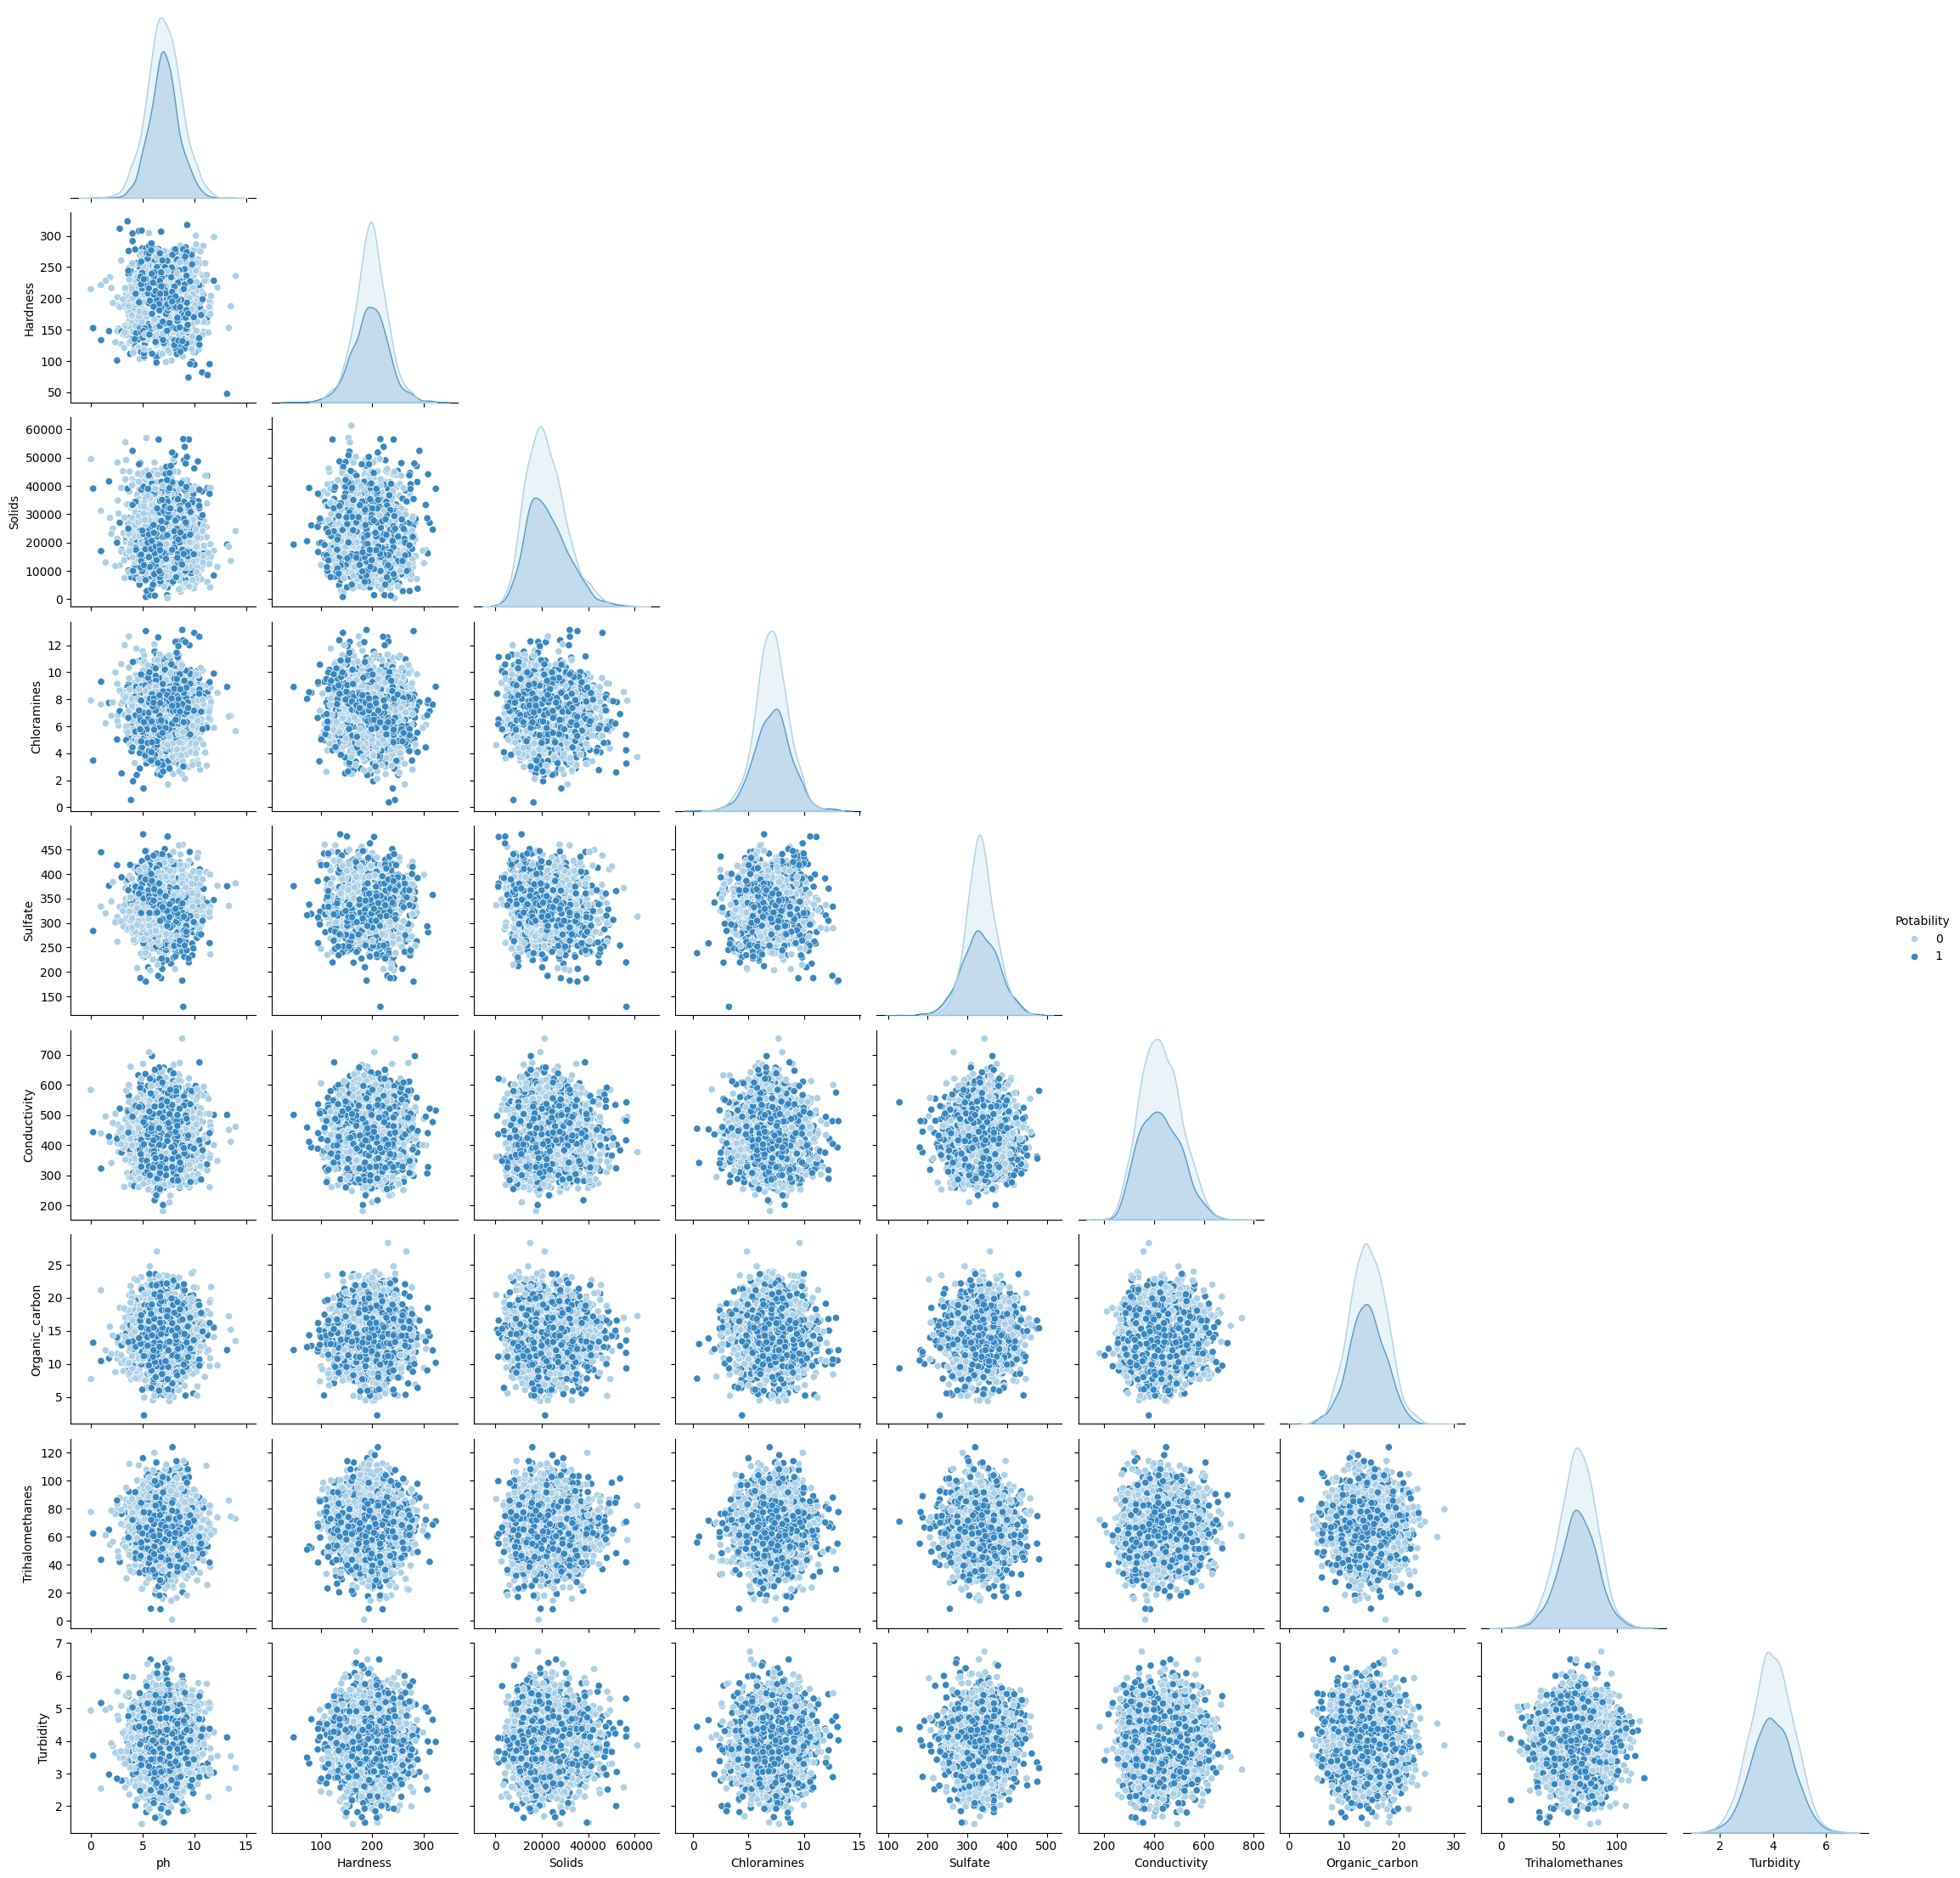

In [74]:
sns.pairplot(data, hue='Potability', corner=True,palette='Blues')
plt.show()

In [75]:
data.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [76]:
print("Number of all samples : ", len(data))

Number of all samples :  3276


In [77]:
print('Percentage(%) of nulls for each columns : \n')
print((data.isna().sum()/len(data))*100)

Percentage(%) of nulls for each columns : 

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64


In [80]:
print("For Potability=1")
data[data.Potability==1][['ph','Sulfate','Trihalomethanes']].median()

For Potability=1


ph                   7.036752
Sulfate            331.838167
Trihalomethanes     66.678214
dtype: float64

In [81]:
print("For Potability=0")
data[data.Potability==0][['ph','Sulfate','Trihalomethanes']].median()

For Potability=0


ph                   7.035456
Sulfate            333.389426
Trihalomethanes     66.542198
dtype: float64

In [88]:
data['ph']=data['ph'].fillna(value=data['ph'].median())
data['Sulfate'] = data['Sulfate'].fillna(value=data['Sulfate'].median())
data['Trihalomethanes'] = data['Trihalomethanes'].fillna(value=data['Trihalomethanes'].median())

In [89]:
data.isna().sum().sum()

0

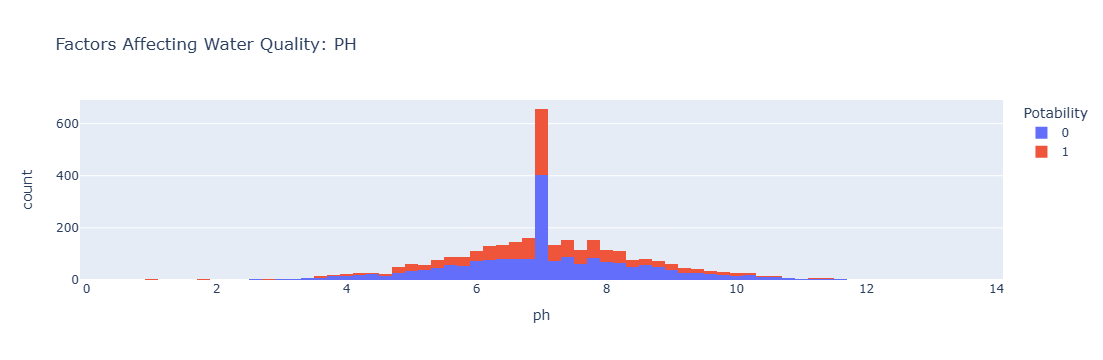

In [91]:
figure = px.histogram(data, x = "ph", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: PH")
figure.show()

The ph column represents the ph value of the water which is an important factor in evaluating the acid-base balance of the water. The pH value of drinking water should be between 6.5 and 8.5. Now let’s look at the second factor affecting water quality in the dataset:

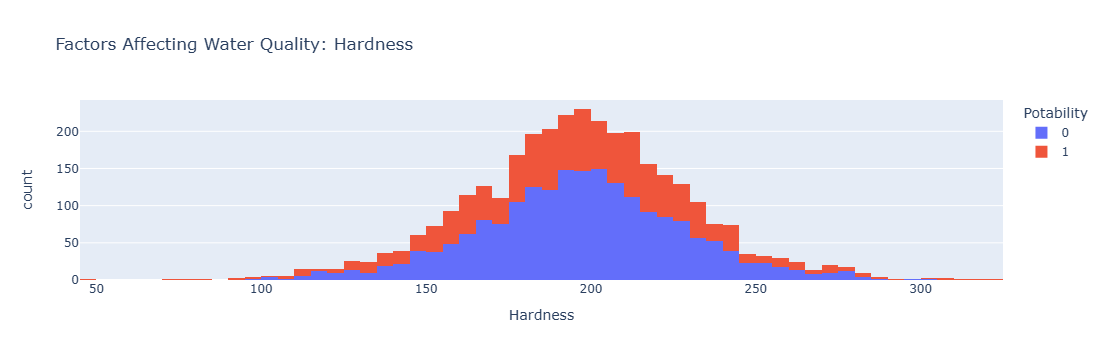

In [96]:
figure=px.histogram(data,x="Hardness",color='Potability',title= "Factors Affecting Water Quality: Hardness")


figure.show()

The figure above shows the distribution of water hardness in the dataset. The hardness of water usually depends on its source, but water with a hardness of 120-200 milligrams is drinkable. Now let’s take a look at the next factor affecting water quality:

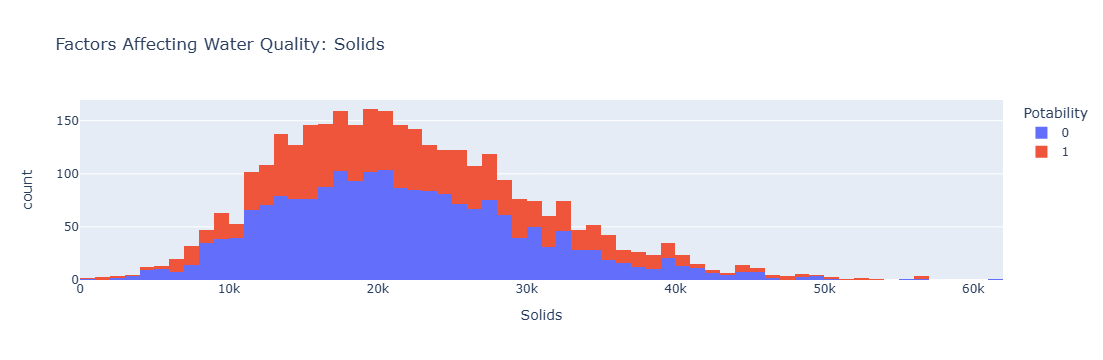

In [98]:
figure=px.histogram(data,x='Solids',color='Potability',title="Factors Affecting Water Quality: Solids")
figure.show()


The figure above represents the distribution of total dissolved solids in water in the dataset. All organic and inorganic minerals present in water are called dissolved solids. Water with a very high number of dissolved solids is highly mineralized. Now let’s take a look at the next factor affecting water quality:

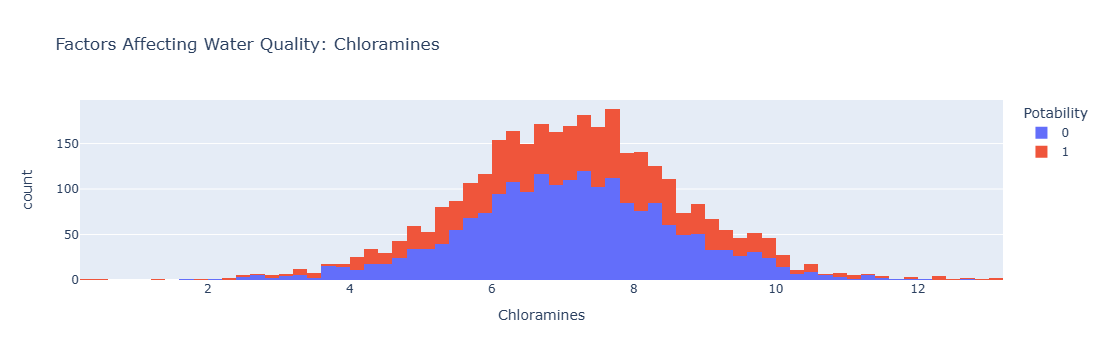

In [99]:
figure = px.histogram(data, x = "Chloramines", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: Chloramines")
figure.show()

The figure above represents the distribution of chloramine in water in the dataset. Chloramine and chlorine are disinfectants used in public water systems. Now let’s take a look at the next factor affecting water quality:

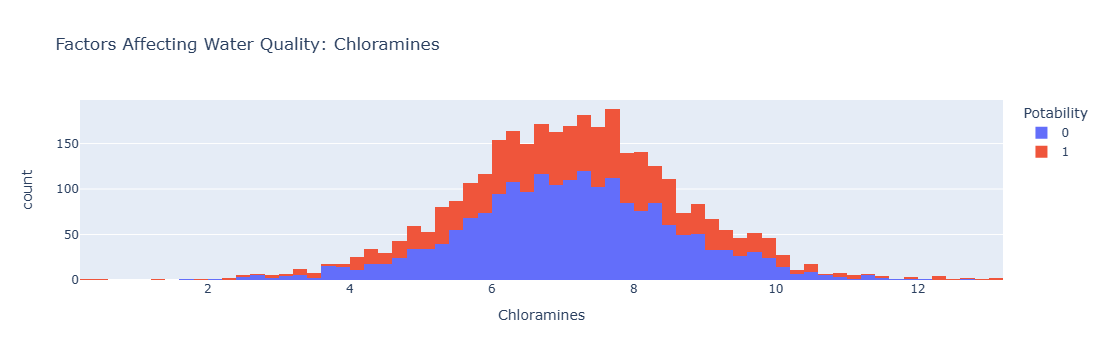

In [100]:
igure = px.histogram(data, x = "Sulfate", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: Sulfate")
figure.show()

The figure above shows the distribution of sulfate in water in the dataset. They are substances naturally present in minerals, soil and rocks. Water containing less than 500 milligrams of sulfate is safe to drink. Now let’s see the next factor:

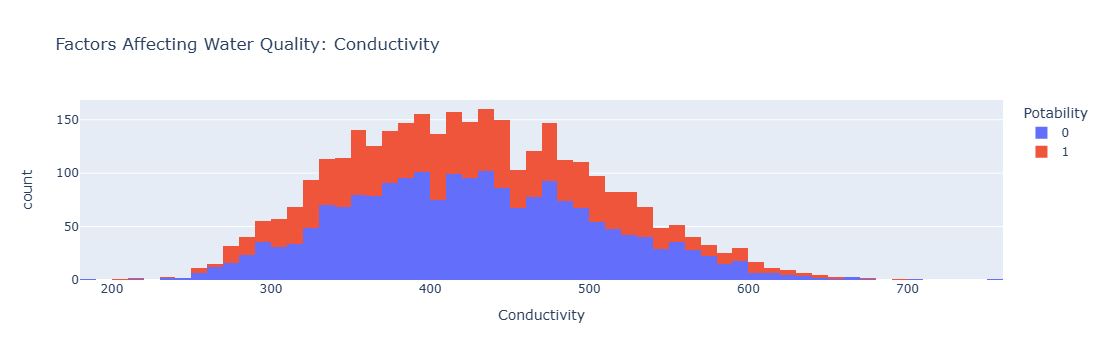

In [101]:
figure = px.histogram(data, x = "Conductivity", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: Conductivity")
figure.show()

The figure above represents the distribution of water conductivity in the dataset. Water is a good conductor of electricity, but the purest form of water is not a good conductor of electricity. Water with an electrical conductivity of less than 500 is drinkable. Now let’s see the next factor:

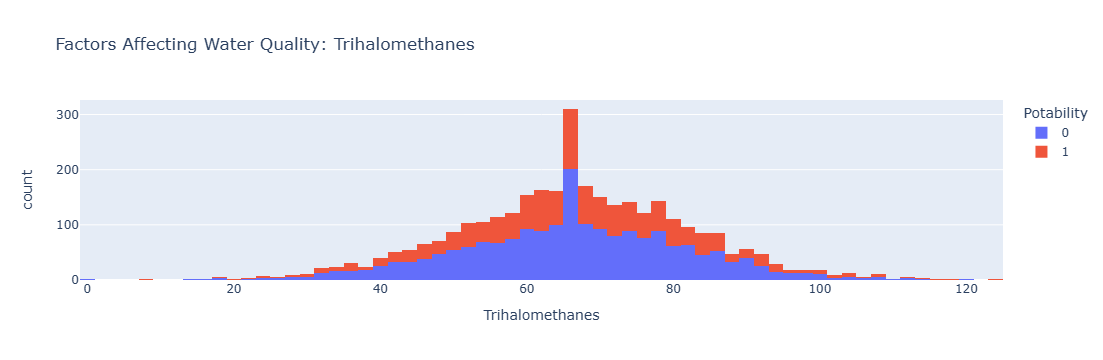

In [103]:
figure = px.histogram(data, x = "Trihalomethanes", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: Trihalomethanes")
figure.show()

he figure above represents the distribution of trihalomethanes or THMs in water in the dataset. THMs are chemicals found in chlorine-treated water. Water containing less than 80 milligrams of THMs is considered safe to drink

💧  Normalization

➡️ Use Potability as target. 👍

➡️ Using MinMaxScaler() to map values in range [0, 1] (Normalization)

In [104]:
# Define X, y
X = data.drop(columns='Potability')
y = data.Potability

In [107]:
#from termcolor import colored
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
#print(colored('\nAll libraries imported succesfully', 'green'))

In [112]:
scalar=MinMaxScaler(feature_range=(0, 1))
df=pd.DataFrame(scalar.fit_transform(X),columns=X.columns)
df.describe().loc[['min', 'mean', 'std', 'max']].T.style.background_gradient(axis=1)

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [116]:
# A function to plot "Confusion Matrix" and "Classification Report"
def plot_result(y_pred) :
    '''
    1) plot Confusion Matrix
    2) plot Classification Report
    '''
    fig, ax = plt.subplots(1, 2, figsize=(15, 4))
    fig.tight_layout()
    #AX left - Confusion Matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    ax[0]=sns.heatmap(cm, cmap='Blues', annot=True, fmt='', linewidths=0.5, ax=ax[0])
    ax[0].set_xlabel('Prediced labels', fontsize=18)
    ax[0].set_ylabel('True labels', fontsize=18)
    ax[0].set_title('Confusion Matrix', fontsize=25)
    ax[0].xaxis.set_ticklabels(['0', '1'])
    ax[0].yaxis.set_ticklabels(['0', '1'])
    #
    # AX Right - Classification Report
    cr = pd.DataFrame(metrics.classification_report(y_test, y_pred, digits=3, output_dict=True)).T
    cr.drop(columns='support', inplace=True)
    ax[1] = sns.heatmap(cr, cmap='Blues', annot=True, fmt='0.3f', linewidths=0.5, ax=ax[1])
    ax[1].xaxis.tick_top()
    ax[1].set_title('Classification Report', fontsize=25)
    plt.show()


In [118]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'C' : [0.001, 1, 1000],
    'class_weight' : ['balanced', None],
    'solver' : ['liblinear', 'sag'],
    'penalty' : ['l2'],
    'n_jobs' : [-1],
}

lr = LogisticRegression()
lr_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=20).fit(X_train, y_train)

lr_cv

C:\Users\Ashraf Sakil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.

C:\Users\Ashraf Sakil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.

C:\Users\Ashraf Sakil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.

C:\Users\Ashraf Sakil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.

C:\Users\Ashraf Sakil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\

GridSearchCV(cv=20, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 1, 1000],
                         'class_weight': ['balanced', None], 'n_jobs': [-1],
                         'penalty': ['l2'], 'solver': ['liblinear', 'sag']})

In [119]:
lr = LogisticRegression(**lr_cv.best_params_).fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

lr_score = round(lr.score(X_test, y_test), 3)

C:\Users\Ashraf Sakil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1216: UserWarning:

'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.



In [120]:
lr_score

0.627

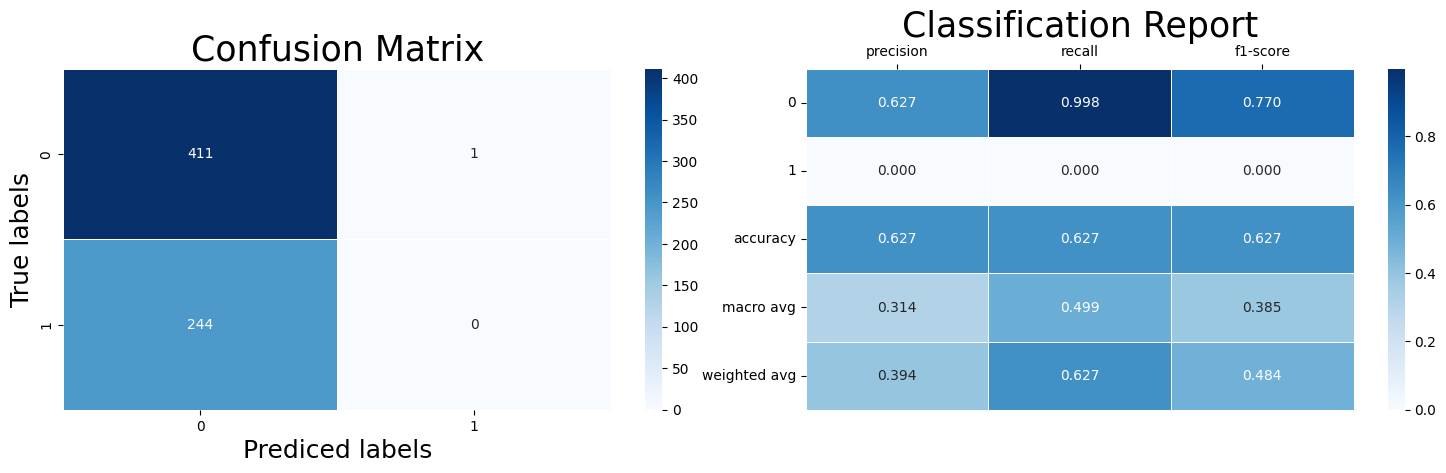

In [121]:
plot_result(y_pred_lr)


💧  RandomForestClassifier

In [122]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'n_estimators' : [1000],
    'criterion' : ['log_loss'],
    'max_features' : ['sqrt'],
    'n_jobs' : [-1]
}

rf = RandomForestClassifier()
rf_cv = GridSearchCV(estimator=rf, param_grid=parameters, cv=20).fit(X_train, y_train)

In [123]:
rf = RandomForestClassifier(**rf_cv.best_params_).fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

rf_score = round(rf.score(X_test, y_test), 3)

In [125]:
rf_score

0.694

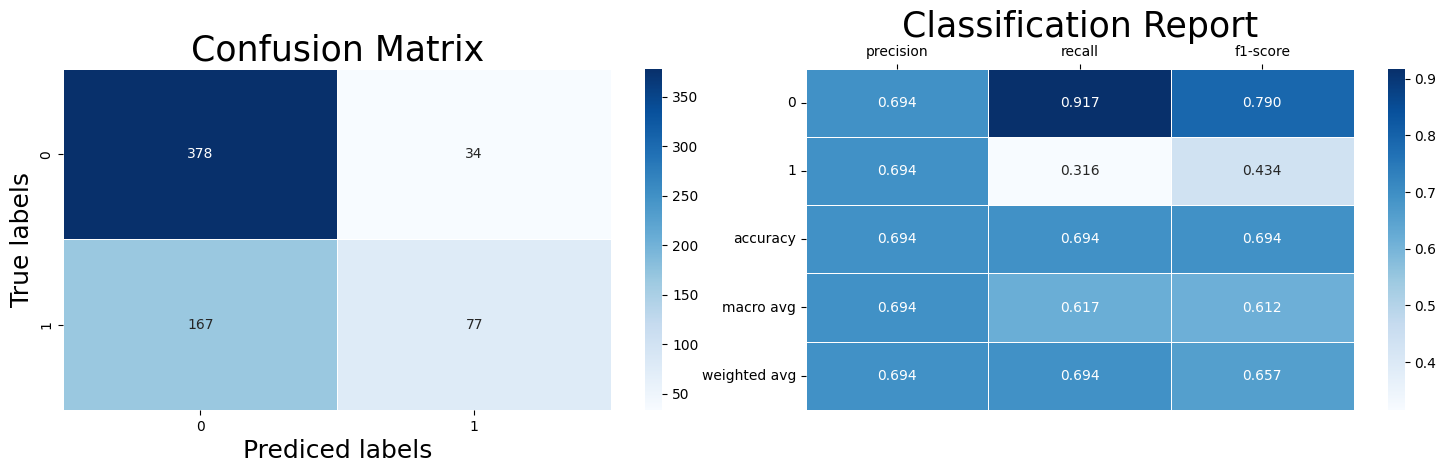

In [124]:
plot_result(y_pred_rf)

💧  KNeighborsClassifier

In [127]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'n_neighbors' : list(np.arange(3, 50, 2)),
    'weights': ['uniform', 'distance'],
    'p' : [1, 2, 3, 4]
}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(estimator=knn, cv=10, param_grid=parameters).fit(X_train, y_train)

In [128]:
knn = KNeighborsClassifier(**knn_cv.best_params_).fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

knn_score = round(knn.score(X_test, y_test), 3)

In [129]:
knn_score

0.616

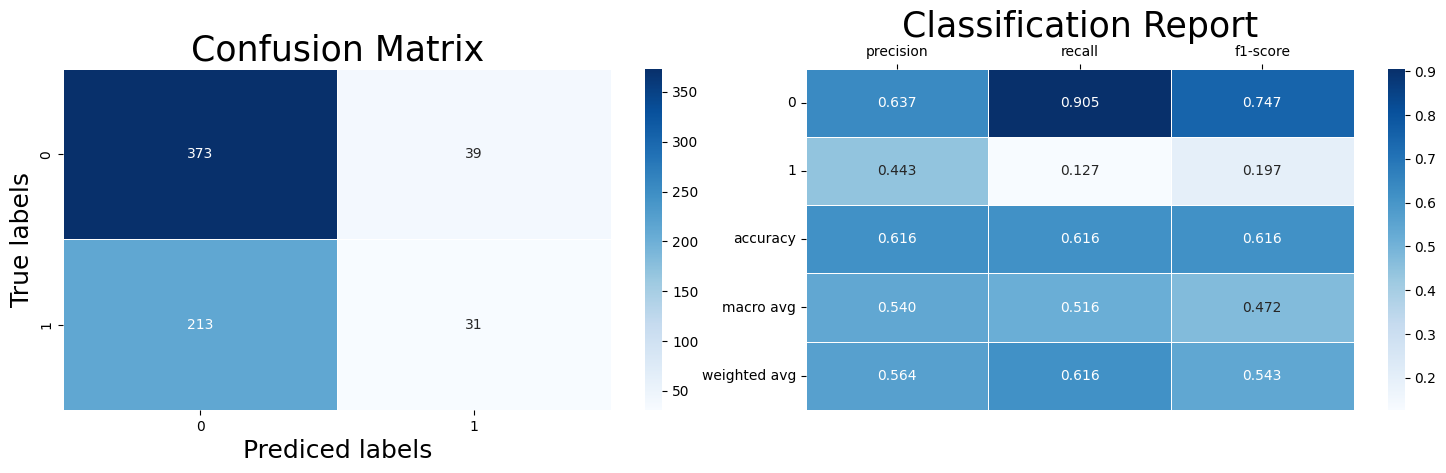

In [130]:
plot_result(y_pred_knn)

In [132]:
result = pd.DataFrame({
    'Algorithm' : ['RandomForestClassifier', 'LogisticRegression', 'KNeighborsClassifier'],
    'Score' : [rf_score, lr_score,  knn_score]
})


result.style.background_gradient()

                                        ➡️ Best algorithm is RandomForestClassifier with score=0.688